In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

In [3]:
from os import listdir
from os.path import isfile, join

In [4]:
#!git clone https://github.com/Marinku099/Sci-project-m5.git

In [5]:
# not sure the real size
width = 450
hieght = 550

In [6]:
df = pd.read_excel(r"data\cdi-data-scan1266.xlsx", sheet_name=r"depressed-data")
#df = df[["ID","Pt","DEP","Age","Sex"]] #1 = depressed

In [7]:
df

,QuizName,ZipGradeID,ID,Age,Sex,DEP,Pt,PossiblePts,PercentCorrect,QuizCreated,...,PossPt25,Stu26,Key26,EarnedPt26,PossPt26,Stu27,Key27,EarnedPt27,PossPt27,NULL
0,เนเธเธเธเธฑเธ”เธเธฃเธญเธเธเธถเธกเน€เธจเ...,1130,1,13,0,0,8,27,29.6,เธก.เธ. 19 2024 03:39 PM,...,1,A,B,0,1,A,B,0,1,0
1,เนเธเธเธเธฑเธ”เธเธฃเธญเธเธเธถเธกเน€เธจเ...,2120,2,12,0,1,15,27,55.6,เธก.เธ. 19 2024 03:36 PM,...,1,B,B,1,1,B,B,1,1,0
2,เนเธเธเธเธฑเธ”เธเธฃเธญเธเธเธถเธกเน€เธจเ...,3121,3,12,1,0,8,27,29.6,เธก.เธ. 19 2024 03:36 PM,...,1,A,B,0,1,A,B,0,1,0
3,เนเธเธเธเธฑเธ”เธเธฃเธญเธเธเธถเธกเน€เธจเ...,4131,4,13,1,0,13,27,48.1,เธก.เธ. 19 2024 03:37 PM,...,1,A,B,0,1,A,B,0,1,0
4,เนเธเธเธเธฑเธ”เธเธฃเธญเธเธเธถเธกเน€เธจเ...,5120,5,12,0,1,15,27,55.6,เธก.เธ. 19 2024 03:36 PM,...,1,A,B,0,1,A,B,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,เนเธเธเธเธฑเธ”เธเธฃเธญเธเธเธถเธกเน€เธจเ...,543150,543,15,0,1,23,27,85.2,เธก.เธ. 18 2024 04:35 PM,...,1,B,B,1,1,B,B,1,1,0
474,เนเธเธเธเธฑเธ”เธเธฃเธญเธเธเธถเธกเน€เธจเ...,544151,544,15,1,0,6,27,22.2,เธก.เธ. 18 2024 04:35 PM,...,1,A,B,0,1,A,B,0,1,0
475,เนเธเธเธเธฑเธ”เธเธฃเธญเธเธเธถเธกเน€เธจเ...,545150,545,15,0,1,28,27,103.7,เธก.เธ. 18 2024 04:35 PM,...,1,B,B,1,1,A,B,0,1,0
476,เนเธเธเธเธฑเธ”เธเธฃเธญเธเธเธถเธกเน€เธจเ...,546111,546,11,1,0,13,27,48.1,เธก.เธ. 18 2024 04:35 PM,...,1,A,B,0,1,A,B,0,1,0


In [8]:
def labelfeatures(ID):
    i = df['Pt'][df['ID']==ID].index
    # score = df.loc[0, "Pt"]
    score = df.loc[i[0], ["Pt","Age","Sex"]]
    score.to_numpy()
    return score

In [17]:
def labelY(ID):
    i = df['DEP'][df['ID']==ID].index
    # score = df.loc[0, "Pt"]
    y = df.loc[i[0], "DEP"]
    return y

In [18]:
def img2data(path):
  img_data = []
  DEP = []

  IDs = []
  features = []

  for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    for item in tqdm(os.listdir(folder_path)):
      filePath = os.path.join(folder_path, item)

      # print(item)
      ID = int(item.split('.')[0])
      DEP.append(labelY(ID))

      IDs.append(ID)
      features.append(labelfeatures(ID))
      

      img = cv2.imread(filePath, cv2.IMREAD_GRAYSCALE)
      # plt.imshow(img)

      img = cv2.resize(img , (width, hieght))
      # img.append(score)

      img_data.append(img)

  return img_data, DEP, IDs, features

In [19]:
img,Y, img_name, features,  = img2data(r"data_label")
#flattened_images = img.reshape(img.shape[0], -1)
x_train, x_test, y_train, y_test = train_test_split(img, Y, random_state=0, train_size=.8)
# print(img)

100%|██████████| 266/266 [00:01<00:00, 236.37it/s]


In [33]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((376, 550, 450), (94, 550, 450), (376,), (94,))

In [60]:
model = keras.Sequential([
    keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(hieght,width, 1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(16),
    keras.layers.Flatten(),
    keras.layers.Dense(2, activation='softmax')
])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 448, 548, 128)     1280      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 224, 274, 128)     0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 224, 274, 128)     0         
                                                                 
 dense_2 (Dense)             (None, 224, 274, 16)      2064      
                                                                 
 flatten_1 (Flatten)         (None, 982016)            0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1964034   
                                                        

In [61]:
#model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
batch_size = 32
epochs = 10

In [62]:
history = model.fit( x_train, y_train, batch_size= batch_size, epochs= epochs, validation_data=(x_test, y_test) )

Epoch 1/10



c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



12/12 [==============================] - 175s 14s/step - loss: 0.8436 - accuracy: 0.5133 - val_loss: 0.7619 - val_accuracy: 0.5638
Epoch 2/10
12/12 [==============================] - 149s 12s/step - loss: 0.7911 - accuracy: 0.4920 - val_loss: 0.6852 - val_accuracy: 0.5638
Epoch 3/10
12/12 [==============================] - 100s 8s/step - loss: 0.7572 - accuracy: 0.5399 - val_loss: 0.7088 - val_accuracy: 0.5638
Epoch 4/10
12/12 [==============================] - 146s 12s/step - loss: 0.7226 - accuracy: 0.5239 - val_loss: 0.6867 - val_accuracy: 0.5638
Epoch 5/10
12/12 [==============================] - 145s 12s/step - loss: 0.6874 - accuracy: 0.5665 - val_loss: 0.6870 - val_accuracy: 0.5638
Epoch 6/10
12/12 [==============================] - 124s 10s/step - loss: 0.6904 - accuracy: 0.5665 - val_loss: 0.6907 - val_accuracy: 0.5638
Epoch 7/10
12/12 [==============================] - 130s 11s/step - loss: 0.6908 - accuracy: 0.5665 - val_loss: 0.6890 - val_accuracy: 0.5638
Epoch 8/10
12/12 [

3/3 - 2s - loss: 0.6855 - accuracy: 0.5638 - 2s/epoch - 791ms/step


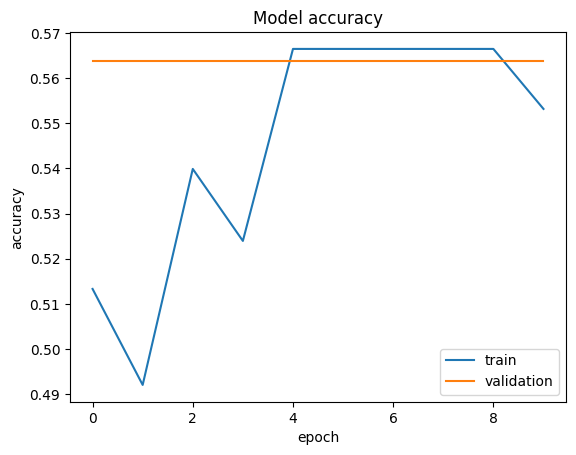

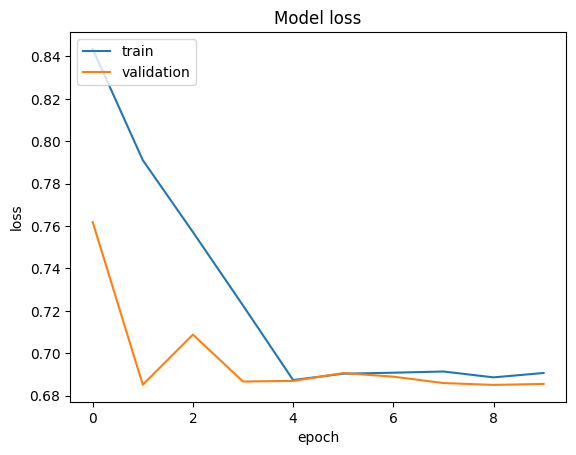

In [68]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train','validation'],loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
plt.show()
# "LOSS"

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [77]:
rimg = []
testPath = r"data_label"

for imgPath in (testPath):
    for item in (os.listdir(testPath)):
        file = os.path.join(testPath, item)
        if item.split('.')[0] != "":
            img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
            img
            img = cv2.resize(img , (width, hieght))

            rimg = np.array(img)
            rimg = rimg.astype('float32')

            predict = model.predict(rimg)
            label = ['DEP','un DEP']
            result = label[int(predict)]
            print('real:' + str(item))
            print('predict' + str(result))

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
